# =============================================================================
# KORAK 1: UVOZ BIBLIOTEKA I UČITAVANJE PODATAKA
# =============================================================================
# Objašnjenje: "Kao prvo, moramo uvesti alate koje ćemo koristiti. 'pandas' je
# švicarski nožić za rad s podacima u Pythonu."

In [4]:
import pandas as pd

# Objašnjenje: "Sada ćemo učitati naš CSV file u nešto što pandas zove DataFrame.
# Zamislite DataFrame kao pametnu Excel tablicu unutar Pythona."

In [9]:
data = pd.read_csv('prodaja.csv')

# =============================================================================
# KORAK 2: OSNOVNA INSPEKCIJA PODATAKA (Exploratory Data Analysis - EDA)
# =============================================================================
# Objašnjenje: "Prva stvar koju SVAKI data analyst radi je da pogleda podatke.
# Nikad ne vjerujte podacima na prvu. Idemo vidjeti s čime radimo."

In [12]:
# Prikaz prvih 5 redova - bolji od print(data) za velike fileove
print("Prvih 5 redova podataka:")
print(data.head())

Prvih 5 redova podataka:
   ID Narudzbe       Datum Prodavaonica Proizvod  Kolicina Prodana  \
0            1  2025-10-15            A   Jabuka             100.0   
1            2  2025-10-15            A   Banana             150.0   
2            3  2025-10-16            B   Jabuka              80.0   
3            4  2025-10-16            B   Banana               NaN   
4            5  2025-10-17            A  Naran?a             120.0   

   Cijena Po Komadu (EUR) Promocija  Ocjena Kupca  
0                    0.50        Da           5.0  
1                    0.30        Ne           4.0  
2                    0.55       NaN           3.0  
3                    0.35        Ne           NaN  
4                    0.60        Da           5.0  


In [14]:
# Prikaz osnovnih informacija o DataFrame-u
print("\nOsnovne informacije o stupcima i tipovima podataka:")
print(data.info())
# Naglasak: "Obratite pažnju na 'Non-Null Count'. Vidimo da neki stupci
# imaju manje od 8 vrijednosti, što znači da imamo nedostajuće podatke!"


Osnovne informacije o stupcima i tipovima podataka:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Narudzbe             8 non-null      int64  
 1   Datum                   8 non-null      object 
 2   Prodavaonica            8 non-null      object 
 3   Proizvod                8 non-null      object 
 4   Kolicina Prodana        7 non-null      float64
 5   Cijena Po Komadu (EUR)  7 non-null      float64
 6   Promocija               7 non-null      object 
 7   Ocjena Kupca            6 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 644.0+ bytes
None


In [16]:
# Prikaz osnovnih statistika za numeričke stupce
print("\nOsnovne statistike (prosjek, min, max...):")
print(data.describe())
# Naglasak: "Ovo nam odmah daje osjećaj za raspone vrijednosti.
# Npr. prosječna prodana količina je..."


Osnovne statistike (prosjek, min, max...):
       ID Narudzbe  Kolicina Prodana  Cijena Po Komadu (EUR)  Ocjena Kupca
count      8.00000          7.000000                7.000000      6.000000
mean       4.50000        125.000000                0.447143      3.833333
std        2.44949         40.517486                0.114268      1.169045
min        1.00000         80.000000                0.300000      2.000000
25%        2.75000         97.500000                0.350000      3.250000
50%        4.50000        120.000000                0.480000      4.000000
75%        6.25000        140.000000                0.525000      4.750000
max        8.00000        200.000000                0.600000      5.000000


# =============================================================================
# KORAK 3: ČIŠĆENJE I PRIPREMA PODATAKA (Data Cleaning & Preprocessing)
# =============================================================================
# Objašnjenje: "Sada slijedi najvažniji dio posla, koji oduzima i do 80% vremena
# u stvarnim projektima - čišćenje podataka. Naš set ima nedostajuće vrijednosti."

In [36]:
# Rješavanje nedostajućih vrijednosti
# Za kategoričke varijable (Promocija), popunimo s najčešćom vrijednosti ili 'Nepoznato'
data['Promocija'] = data['Promocija'].fillna('Ne')
# Objašnjenje: "Ako ne znamo je li bila promocija, najsigurnije je pretpostaviti da nije."

In [21]:
# Za numeričke varijable, popunimo s prosjekom ili medijanom stupca
prosjecna_kolicina = data['Kolicina Prodana'].mean()
data['Kolicina Prodana'].fillna(prosjecna_kolicina, inplace=True)
# Objašnjenje: "Nedostajuću količinu ćemo zamijeniti s prosječnom prodanom količinom
# svih ostalih proizvoda. To je česta praksa."


C:\Users\abhothoh\AppData\Local\Temp\ipykernel_26572\1501909619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Kolicina Prodana'].fillna(prosjecna_kolicina, inplace=True)


In [23]:
# Možemo i obrisati redove gdje ključne informacije nedostaju (npr. cijena)
data.dropna(subset=['Cijena Po Komadu (EUR)'], inplace=True)
# Objašnjenje: "Ako nemamo cijenu, taj red nam je beskoristan za financijsku analizu, pa ga brišemo."

In [25]:
# Provjera nakon čišćenja
print("\nInformacije nakon čišćenja podataka:")
print(data.info())
# Naglasak: "Sada vidite da svi stupci imaju isti broj 'Non-Null' vrijednosti.
# Naši podaci su sada 'čisti' i spremni za analizu."


Informacije nakon čišćenja podataka:
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Narudzbe             7 non-null      int64  
 1   Datum                   7 non-null      object 
 2   Prodavaonica            7 non-null      object 
 3   Proizvod                7 non-null      object 
 4   Kolicina Prodana        7 non-null      float64
 5   Cijena Po Komadu (EUR)  7 non-null      float64
 6   Promocija               7 non-null      object 
 7   Ocjena Kupca            6 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 504.0+ bytes
None


# =============================================================================
# KORAK 4: ANALIZA I VIZUALIZACIJA
# =============================================================================
# Objašnjenje: "Sada kada imamo čiste podatke, možemo raditi ono zabavno -
# postavljati pitanja i tražiti odgovore. Npr. 'Koji proizvod se najviše prodaje?'"

In [28]:
# GRUPIRANJE PODATAKA - moćna funkcionalnost pandasa
ukupna_prodaja_po_proizvodu = data.groupby('Proizvod')['Kolicina Prodana'].sum()
print("\nUkupna prodana količina po proizvodu:")
print(ukupna_prodaja_po_proizvodu)


Ukupna prodana količina po proizvodu:
Proizvod
Banana     370.0
Jabuka     380.0
Naran?a    120.0
Name: Kolicina Prodana, dtype: float64


In [30]:
# VIZUALIZACIJA - sada koristimo matplotlib
import matplotlib.pyplot as plt

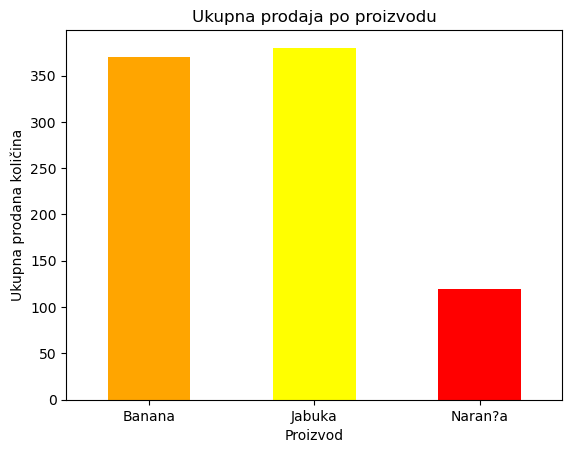

In [32]:
# Stupčasti grafikon (Bar chart) - bolji za usporedbu kategorija
ukupna_prodaja_po_proizvodu.plot(kind='bar', color=['orange', 'yellow', 'red'])
plt.title('Ukupna prodaja po proizvodu')
plt.xlabel('Proizvod')
plt.ylabel('Ukupna prodana količina')
plt.xticks(rotation=0) # Da imena proizvoda ne budu ukošena
plt.show()

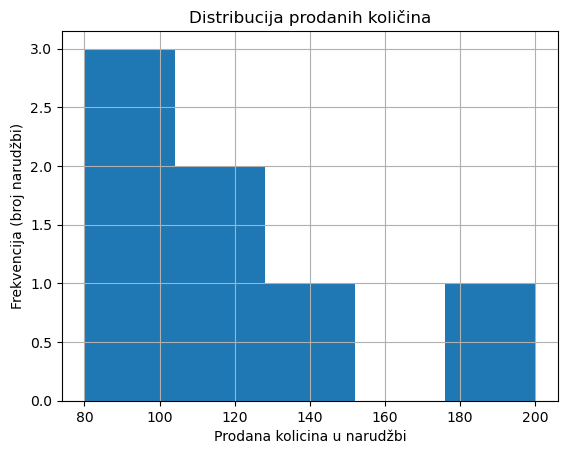

In [34]:
# Histogram kao u vašem originalnom primjeru, ali na čistim podacima
data['Kolicina Prodana'].hist(bins=5)
plt.title('Distribucija prodanih količina')
plt.xlabel('Prodana kolicina u narudžbi')
plt.ylabel('Frekvencija (broj narudžbi)')
plt.show()